In [1]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,Flatten


In [3]:
(X_train,y_train),(X_test,y_test)=keras.datasets.mni mst.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [4]:
X_train.shape

(60000, 28, 28)

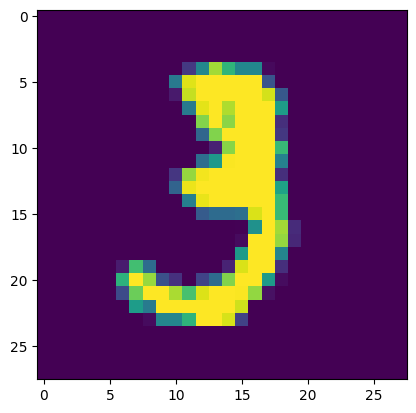

In [10]:
import matplotlib.pyplot as plt
plt.imshow(X_train[10])

In [14]:
X_train=X_train/255
X_test=X_test/255

In [15]:
model=Sequential()

model.add(Flatten(input_shape=(28,28)))
model.add(Dense(128,activation='relu'))
model.add(Dense(10,activation='softmax'))

In [17]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101770 (397.54 KB)
Trainable params: 101770 (397.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [19]:
model.compile(loss='sparse_categorical_crossentropy',optimizer='Adam')

In [20]:
model.fit(X_train,y_train,epochs=10,validation_split=0.2)

Epoch 1/10
1500/1500 [==============================] - 11s 6ms/step - loss: 0.2794 - val_loss: 0.1532
Epoch 2/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.1258 - val_loss: 0.1116
Epoch 3/10
1500/1500 [==============================] - 7s 5ms/step - loss: 0.0873 - val_loss: 0.0959
Epoch 4/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0642 - val_loss: 0.0984
Epoch 5/10
1500/1500 [==============================] - 11s 7ms/step - loss: 0.0496 - val_loss: 0.0926
Epoch 6/10
1500/1500 [==============================] - 9s 6ms/step - loss: 0.0408 - val_loss: 0.0852
Epoch 7/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0298 - val_loss: 0.0945
Epoch 8/10
1500/1500 [==============================] - 7s 5ms/step - loss: 0.0240 - val_loss: 0.0829
Epoch 9/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0196 - val_loss: 0.1020
Epoch 10/10
1500/1500 [==============================] - 7s 5ms/step - loss: 0.0

In [22]:
y_prob=model.predict(X_test)

313/313 [==============================] - 1s 4ms/step


In [24]:
y_prob.shape

(10000, 10)

In [30]:
df=pd.DataFrame(y_prob)

In [31]:
df.head()


,0,1,2,3,4,5,6,7,8,9
0,1.462070e-09,7.879633e-11,7.599753e-08,1.904606e-06,5.922421e-15,5.206389e-12,2.418938e-16,9.999978e-01,8.600329e-10,1.461836e-07
1,5.459824e-10,4.538514e-07,9.999995e-01,3.651147e-08,3.085507e-23,9.349301e-11,3.398514e-12,2.790573e-18,2.125890e-10,3.410733e-17
2,2.638825e-06,9.984883e-01,8.333033e-04,5.000222e-06,7.741778e-06,1.989991e-06,3.397525e-07,3.210107e-04,3.267482e-04,1.274982e-05
3,9.999997e-01,4.186635e-12,1.888841e-07,1.745117e-11,8.659907e-12,4.332263e-09,1.443965e-08,1.092724e-09,3.376498e-14,4.734189e-09
4,2.933972e-07,2.080066e-10,1.148575e-07,1.017792e-10,9.986144e-01,1.168340e-09,1.271049e-09,9.693413e-07,5.749629e-07,1.383685e-03


In [32]:
y_pred=y_prob.argmax(axis=1)

In [33]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.9796